# COGS 108 - Final Project 

# Overview

How important is convenience to us? How far are people willing to travel to a park? This project delves into these questions and attempts to discover what the relationship is between the distance between parks and rec centers in San Diego, California, and how popular the park is in terms of amount of Yelp reviews. The resulting analysis suggests that there is no relationship at all between the amount of Yelp reviews a park has and how close it is to rec centers, if there is any nearby at all.

# Name & GitHub

- Name: Ramsey Cervantes
- GitHub Username: AssertingDust

# Research Question

How does the distance between a park and a rec center affect the park's number of yelp reviews? For this data analysis I will be limiting the scope to parks in San Diego, California.

## Background and Prior Work

People love convenience. When something is close by, people are much more likely to visit it. This is why location is such an important factor to consider when planning where to build a public location such as a park. As the famous saying goes, "location, location, location".

In a related research study that investigated the relationship between the distance of a home to gyms and frequency of exercise, the results suggested that the easier it is for one to visit a gym correlated with an increase in exercise [2]. This conclusion provides evidence that one is more likely to visit a location the more convenient it is to do so. In another related study that investigated the relationship between location of a business and its success, it observed that the closer a restaurant is to a landmark the more likely it was to succeed [1]. Both of these findings suggest a direct relationship between location convenience and location popularity. 


References:
- 1) https://dl.acm.org/doi/abs/10.1145/3341161.3345334
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1580056/

# Hypothesis


I hypothesize that the closer a park is to a rec center will result in having a higher amount of yelp reviews. This is because the convenience provided by having a park close to a rec center will increase the park's popularity which will be reflected in the amount of yelp reviews it has.

# Dataset(s)

Dataset 1:
- Dataset Name: Rec Center Locations Data
- Link to the dataset: https://data.sandiego.gov/datasets/recreation-center-locations/
- Number of observations: 57

This dataset provides information about rec center locations in San Diego, most important are addresses and coordinates.

Dataset 2:
- Dataset Name: Yelp Data for San Diego Parks
- Link to the dataset: https://www.yelp.com/
- Number of observations: 833

This dataset provides information about Yelp reviews for San Diego parks, most important are ratings and location.

I plan to combine both datasets in order to compare the locations of parks and rec centers in San Diego, specifically looking at how close in proximity each park is to a rec center. With this, I will also then compare the amount of reviews each park has in order to determine what the relationship is between the factors.

# Setup

In [1]:
#imports
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt
   
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

#read datasets
df_rec = gpd.read_file('rec_centers_datasd.geojson')
df_yelp = pd.read_csv('yelp_SD_parks.csv')

In [2]:
#Preview of Rec Center Dataset
df_rec.head()

,objectid,rec_bldg,park_name,address,zip,sq_ft,year_built,serv_dist,adult_ctr,comfort_st,...,stage,teen_ctr,tinytot_rm,weight_rm,current_cd,fy13_cd,facility_n,thomas_bro,community,geometry
0,2935,Scripps Ranch Rec Center,Scripps Ranch Community Park,11454 Blue Cypress Dr,92131,12080,2000,40,0,0,...,0,0,0,0,5,5,10279,1210-A2,MIRAMAR RANCH NORTH,POINT (-117.07986 32.92867)
1,2936,North Park Rec Center,North Park Community Park,4044 Idaho St,92104,11230,1947,41,1,0,...,0,1,1,0,3,3,488,1269-D5,NORTH PARK,POINT (-117.13418 32.75090)
2,2937,Southcrest Rec Center,Southcrest Community Park,4149 Newton Av,92113,10620,1964,43,0,0,...,0,1,0,1,8,9,299,1289-H6,SOUTHCREST,POINT (-117.10459 32.69427)
3,2938,Azalea Rec Center,Azalea Neighborhood Park,2596 Violet St,92105,1790,1973,41,0,0,...,0,0,0,0,3,9,1072,1269-H7,AZALEA/HOLLYWOOD PARK,POINT (-117.10817 32.73236)
4,2939,Colina Del Sol Rec Center,Colina Del Sol Community Park,5319 Orange Av,92115,6560,1962,41,0,0,...,0,0,0,0,7,9,491,1269-H4,COLINA DEL SOL,POINT (-117.08012 32.75282)


In [3]:
#Preview of Park Dataset
df_yelp.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


# Data Cleaning

In [4]:
#drop unnecessary columns
df_rec = df_rec.drop(['objectid','zip','sq_ft','year_built','serv_dist','adult_ctr','comfort_st','stage','teen_ctr','tinytot_rm','weight_rm','current_cd','fy13_cd','facility_n','thomas_bro','comp_rm','dance_rm','game_rm','gymnasium','kiln','kiln_rm','kitchen','multp_rm','racqb_ct','address','community'], axis=1)
df_rec.head()

,rec_bldg,park_name,geometry
0,Scripps Ranch Rec Center,Scripps Ranch Community Park,POINT (-117.07986 32.92867)
1,North Park Rec Center,North Park Community Park,POINT (-117.13418 32.75090)
2,Southcrest Rec Center,Southcrest Community Park,POINT (-117.10459 32.69427)
3,Azalea Rec Center,Azalea Neighborhood Park,POINT (-117.10817 32.73236)
4,Colina Del Sol Rec Center,Colina Del Sol Community Park,POINT (-117.08012 32.75282)


In [5]:
#drop unnecessary columns
df_yelp = df_yelp.drop(['phone','id','url','rating','rating','is_closed','address'], axis=1)

In [6]:
#rename and reformat columns in yelp dataset to prepare for merge with rec center dataset later
df_yelp.rename(columns={'name':'park_name'}, inplace=True)
df_yelp['longitude'] = df_yelp['longitude'].apply(str)
df_yelp['latitude'] = df_yelp['latitude'].apply(str)
df_yelp['geometry'] = df_yelp[['longitude','latitude']].agg(' '.join,axis=1)
df_yelp = df_yelp.drop(['longitude','latitude'], axis=1)
df_yelp['geometry'] = 'POINT (' + df_yelp['geometry'].astype(str) + ')'
df_yelp.head()

,park_name,review_count,geometry
0,Balboa Park,2105,POINT (-117.15315009999999 32.73450154)
1,Civita Park,46,POINT (-117.147278 32.778315)
2,Waterfront Park,242,POINT (-117.1724795 32.721952)
3,Trolley Barn Park,102,POINT (-117.14378880000001 32.76246318)
4,Bay View Park,42,POINT (-117.17896699999999 32.701785)


In [7]:
#reformat column in rec center dataset to prepare for merge with yelp dataset
df_rec['geometry'] = df_rec['geometry'].astype(str)

In [8]:
#merge datasets together and have parks without nearby rec centers have zero values to represent NaN
df_compare = pd.merge(df_yelp, df_rec, on=['park_name'], how='outer')
df_compare['geometry_x'] = df_compare['geometry_x'].replace(np.nan,'POINT(0 0)')
df_compare['geometry_y'] = df_compare['geometry_y'].replace(np.nan,'POINT(0 0)')

#reformat merged dataset to be useable with geopandas
df_compare['geometry_x'] = df_compare['geometry_x'].apply(wkt.loads)
df_compare['geometry_y'] = df_compare['geometry_y'].apply(wkt.loads)

In [9]:
#create zero point for NaN comparison when calculating distance between parks and nearby rec centers
zero_point = pd.Series('POINT(0 0)')
zero_point = zero_point.apply(wkt.loads)

In [10]:
#create blank distance column
df_compare['distance'] = df_compare.apply(lambda _: '', axis=1)

In [11]:
#calculate distance in meters between parks and nearby rec centers
index = 0
while index < df_compare.count()[0]:
    if df_compare['geometry_y'][index] != zero_point[0]:
        df_points = gpd.GeoDataFrame({'geometry': [df_compare['geometry_x'][index], df_compare['geometry_y'][index]]}, crs='EPSG:4326')
        df_points = df_points.to_crs('EPSG:5234')
        df2_points = df_points.shift()
        df_compare['distance'][index] = df_points.distance(df2_points)[1]
    index = index + 1

In [16]:
#cleanup finalized data by dropping non-park locations and unrated locations. Also rename location columns for easier readability
df_compare = df_compare.dropna(subset=['review_count'])
df_compare = df_compare[df_compare['park_name'].str.contains('Park')]
df_compare = df_compare.rename(columns={'geometry_x':'park_location', 'geometry_y':'rec_center_location'})

#create separate datasets for data analysis, one for only parks with nearby rec centers and another for all parks
df_compare_all = df_compare.copy()
df_compare_some = df_compare.copy()

#replace blank distance values with arbitrary 99,999 distance to represent a NaN value that we can plot later
df_compare_all['distance'] = df_compare_all['distance'].replace('',99999)
#replace blank distance values with NaN values to ignore when we plot later
df_compare_some['distance'] = df_compare_some['distance'].replace('',np.nan)

#sort datasets by distance
df_compare_all = df_compare_all.sort_values('distance')
df_compare_some = df_compare_some.sort_values('distance')
df_compare_all = df_compare_all.reset_index(drop=True)
df_compare_some = df_compare_some.reset_index(drop=True)

In [17]:
df_compare_all.head(20)

,park_name,review_count,park_location,rec_bldg,rec_center_location,distance
0,Canyonside Community Park,7.0,POINT (-117.130233 32.94215006),Canyonside Rec Center,POINT (-117.13029469 32.94227327),15.349744
1,Mira Mesa Community Park,21.0,POINT (-117.1402689 32.91513437),Gil Johnson Mira Mesa Rec Center,POINT (-117.14005692 32.91517115),20.951923
2,Linda Vista Community Park,5.0,POINT (-117.1703149 32.79211464),Linda Vista Rec Center,POINT (-117.16970058 32.79248977),73.505371
3,Allied Gardens Community Park,18.0,POINT (-117.0795614 32.79573642),Allied Gardens Rec Center,POINT (-117.08062862 32.79592625),105.713139
4,Silver Wing Park,4.0,POINT (-117.0528721 32.57751025),Silver Wing Rec Center,POINT (-117.05343115 32.5787625),153.639225
5,North Park Community Park,37.0,POINT (-117.1340879 32.75262899),North Park Rec Center,POINT (-117.13418236 32.75090087),198.580027
6,Balboa Park,2105.0,POINT (-117.1531501 32.73450154),Municipal Gymnasium,POINT (-117.15297513 32.72695611),866.371602
7,Balboa Park,2105.0,POINT (-117.1531501 32.73450154),Balboa Park Activity Center,POINT (-117.14773348 32.72673559),1034.904043
8,Balboa Park,2105.0,POINT (-117.1531501 32.73450154),Golden Hills Rec Center,POINT (-117.13733642 32.72099245),2181.608796
9,Mountain View Park,4.0,POINT (-117.0371587 33.12863674),Mountain View Rec Center,POINT (-117.10787087 32.70000915),49658.552701


In [18]:
df_compare_some.head(20)

,park_name,review_count,park_location,rec_bldg,rec_center_location,distance
0,Canyonside Community Park,7.0,POINT (-117.130233 32.94215006),Canyonside Rec Center,POINT (-117.13029469 32.94227327),15.349744
1,Mira Mesa Community Park,21.0,POINT (-117.1402689 32.91513437),Gil Johnson Mira Mesa Rec Center,POINT (-117.14005692 32.91517115),20.951923
2,Linda Vista Community Park,5.0,POINT (-117.1703149 32.79211464),Linda Vista Rec Center,POINT (-117.16970058 32.79248977),73.505371
3,Allied Gardens Community Park,18.0,POINT (-117.0795614 32.79573642),Allied Gardens Rec Center,POINT (-117.08062862 32.79592625),105.713139
4,Silver Wing Park,4.0,POINT (-117.0528721 32.57751025),Silver Wing Rec Center,POINT (-117.05343115 32.5787625),153.639225
5,North Park Community Park,37.0,POINT (-117.1340879 32.75262899),North Park Rec Center,POINT (-117.13418236 32.75090087),198.580027
6,Balboa Park,2105.0,POINT (-117.1531501 32.73450154),Municipal Gymnasium,POINT (-117.15297513 32.72695611),866.371602
7,Balboa Park,2105.0,POINT (-117.1531501 32.73450154),Balboa Park Activity Center,POINT (-117.14773348 32.72673559),1034.904043
8,Balboa Park,2105.0,POINT (-117.1531501 32.73450154),Golden Hills Rec Center,POINT (-117.13733642 32.72099245),2181.608796
9,Mountain View Park,4.0,POINT (-117.0371587 33.12863674),Mountain View Rec Center,POINT (-117.10787087 32.70000915),49658.552701


# Data Analysis & Results

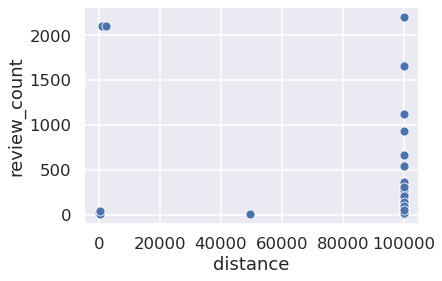

In [20]:
#Fig.1: plot comparison of distance from park to rec centers and review count of park
sns.scatterplot(data = df_compare_all, x = df_compare_all.distance, y = df_compare_all.review_count)

Figure 1 above (which includes the outliers of parks without nearby rec centers) seems to show that the variables of distance and review count are unrelated at all as there is no disernable pattern. Some parks close to rec centers have as few or even far less reviews as parks far away from or without rec centers.

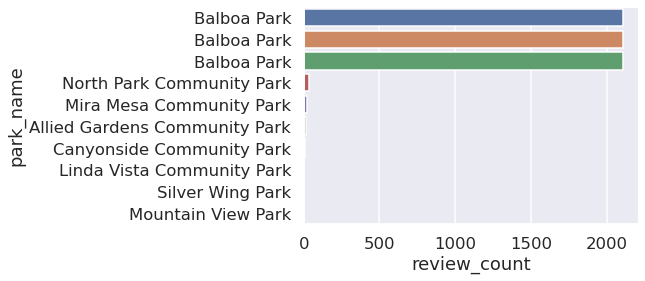

In [34]:
#Fig.2: plot review counts of parks that had nearby rec centers
sns.barplot(x = 'review_count', y = 'park_name', data = df_compare_some.head(10), order=df_compare_some.head(10).sort_values('review_count', ascending = False).park_name)

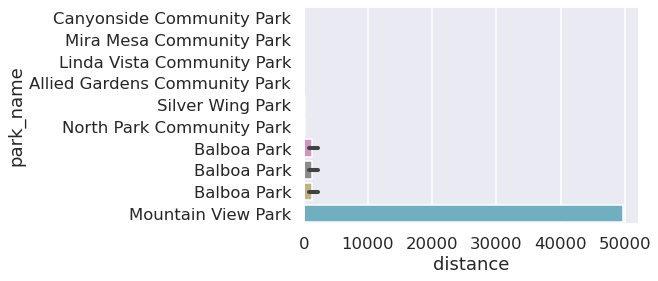

In [32]:
#Fig.3: plot distance between park and rec centers for each park.
sns.barplot(x = 'distance', y = 'park_name', data = df_compare_some.head(10), order=df_compare_some.head(10).sort_values('distance').park_name)

For my analysis approach, I used rank statistics as it seemed natural to use ordinal data to compare between the variables.In both figures, there is drastic differences for the variable amounts between each park which makes the data hard to know if this is a fair analysis as everything could be considered an outlier as there seems to be no pattern/steady progression.

Figures 2 and 3 above (which exlude outliers of parks without rec centers) seem to further cement the conclusion that there is no relationship between how close a park is to rec centers and the amount of yelp reviews it has. In figure 2, we see that Balboa Park is slightly above 2000 reviews, much more than any of the parks with nearby rec centers; however, as seen in figure 3, it is second to last in terms of distance from three nearby rec centers which suggests that there is no correlation between distance and reviews.

# Ethics & Privacy

Due to the nature of my proposal in researching parks and buildings which didn't involve people, I did not need to have any privacy concerns as the only information I was utilizing was the amount of reviews each park has along with the coordinates of the parks and rec centers in San Diego. The dataset for rec centers in San Diego was provided by the San Diego government as they have the information/data readily available on their website to download. The dataset for Yelp reviews for San Diego parks was obtained and curated by Professor Ellis who utilized APIs from Yelp to collect the data. As both datasets were provided for use in the individual final project, this means I have permission to utilize them for this purpose.

A potential issue for this project is due to its nature of being limited in scope to San Diego, California. Being constricted to just one city leaves the results hard to generalize in other city circumstances which means that in order to resolved this issue, a much broader selection of cities must be used. In addition to this, there is the potential for bias to occur for the amount of Yelp reviews a park receives. Parks located in demographic areas such as a elderly dominant area are less likely to reviews as compared to a park next to a university.



# Conclusion & Discussion

Based on the results from the analysis, it seems that for parks in San Diego, California, there is no relationship between the proximity of parks to rec centers and the amount of Yelp reviews a park has. With this, my hypothesis that the closer a park was to a rec center would lead to higher Yelp reviews has been disproven. After calculating the distance of each park in San Diego to a nearby rec center and comparing it to the amount of Yelp reviews the park has by merging the two datasets, I plotted the data on barplots and scatterplots in order to find a pattern. However, it is clear that there is no relationship whatsoever as the data is skewed all over.

As previously mentioned in the ethics section, a limition of this project is how limited in scope it is by being soley focused on parks in San Diego. This limited the amount of usable data and severely affected the generalizability of these results to other cities. However, once these limitions are addressed, I believe that the results could provide insights to how much human behavior will seek convenience.